# Recurrent Neural Network - LSTM -  BTC

### Importing Libraries

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")
import ta

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Loading the Data

In [228]:
df = pd.read_csv("BTC-USD.csv")

#### Datetime Conversion

In [229]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

## Preprocessing Data
#### (adding technical indicators)

In [230]:
# Adding all the indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Dropping everything else besides 'Close' and the Indicators
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)

/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [231]:
# Checking the new df with indicators
print(df.shape)

df.tail(10)

(2005, 69)


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,8755.246094,8.522222e+11,290869079216,-0.029679,-2.089727e+12,-9.569684,-72.441276,-5.199719e+08,354.191336,299.972405,...,47.867243,19.184521,20.248288,-80.815479,-799.290323,8998.343282,-9.613389,-0.370287,-0.370974,1814.409558
2020-03-05,9078.762695,8.788612e+11,330567133813,-0.044336,4.351646e+10,166.485743,-53.538044,1.338227e+09,354.191336,308.656024,...,51.748405,41.035878,26.206956,-58.964122,-734.326853,9003.459999,-6.047894,3.695117,3.628484,1885.149234
2020-03-06,9122.545898,8.925038e+11,371394019463,0.020131,2.926615e+11,49.903434,-51.853186,1.663781e+09,354.191336,291.352043,...,53.564267,43.993137,34.737846,-56.006863,-626.021151,9006.092071,-8.080694,0.482260,0.481100,1894.722806
2020-03-07,8909.954102,8.613936e+11,335177089094,-0.031195,-8.490647e+11,-54.849611,-55.636946,-6.471077e+08,345.937262,289.464495,...,51.244736,29.634000,38.221005,-70.366000,-556.714829,9004.985849,-7.670542,-2.330400,-2.357983,1848.237789
2020-03-08,8108.116211,8.217034e+11,295203986974,-0.070590,-5.306619e+12,-1046.826168,-137.593074,-4.441318e+09,345.937262,341.427127,...,37.800594,0.155066,24.594068,-99.844934,-589.393325,8941.716660,-13.205179,-8.999349,-9.430353,1672.909065
2020-03-09,7923.644531,8.197206e+11,248266991166,-0.125490,-5.785466e+12,-598.335234,-176.835416,-4.665205e+09,345.937262,356.053946,...,35.172298,11.899609,13.896225,-88.100391,-720.298868,8862.213221,-10.168082,-2.275148,-2.301429,1632.572752
2020-03-10,7909.729492,8.023926e+11,206053050173,-0.094721,-5.042887e+12,31.985056,-159.039731,-1.142020e+09,345.329747,352.666764,...,34.430841,13.193606,8.416094,-86.806394,-872.216298,8793.680300,-9.958054,-0.175614,-0.175769,1629.530110
2020-03-11,7911.430176,8.311826e+11,244735812777,-0.087003,-4.313076e+12,-142.556797,-127.828976,-6.581640e+07,345.403997,348.200283,...,39.856198,17.615627,14.236281,-82.384373,-1077.377948,8733.955214,-8.775196,0.021501,0.021499,1629.901979
2020-03-12,4970.788086,7.810874e+11,190755455534,-0.167774,-2.637362e+13,-7970.760717,-681.828056,-2.005593e+10,345.403997,620.256475,...,20.638760,2.563857,11.124364,-97.436143,-1504.250212,7507.742890,-42.196837,-37.169539,-46.473018,986.905396


In [232]:
# Only using the last 1000 days of data to get a more accurate representation of the current climate
df = df.tail(1000)

### Scaling

In [261]:
# Scale fitting the close prices separately for inverse_transformations purposes later
close_df = df[['Close']]

close_scaler = MinMaxScaler()

close_scaler.fit_transform(close_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [246]:
# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df.tail(10)

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,0.388524,0.876893,0.320218,0.367194,0.599675,0.439389,0.383167,0.709651,0.003090,0.127724,...,0.433186,0.191845,0.182755,0.191845,0.314324,0.466131,0.223461,0.589574,0.668292,0.388524
2020-03-05,0.406940,0.905072,0.368990,0.348243,0.652354,0.441017,0.384392,0.777151,0.003090,0.132381,...,0.494932,0.410359,0.244861,0.410359,0.320713,0.466485,0.247914,0.654707,0.726268,0.406940
2020-03-06,0.409432,0.919503,0.419150,0.431597,0.658506,0.439939,0.384502,0.788977,0.003090,0.123100,...,0.523821,0.439931,0.333776,0.439931,0.331365,0.466667,0.233973,0.603233,0.680643,0.409432
2020-03-07,0.397330,0.886594,0.374654,0.365235,0.630312,0.438970,0.384256,0.705033,0.000212,0.122088,...,0.486919,0.296340,0.370080,0.296340,0.338182,0.466591,0.236785,0.558170,0.639488,0.397330
2020-03-08,0.351687,0.844610,0.325544,0.314298,0.520236,0.429799,0.378943,0.567207,0.000212,0.149959,...,0.273033,0.001551,0.228050,0.001551,0.334968,0.462210,0.198828,0.451324,0.536968,0.351687
2020-03-09,0.341187,0.842512,0.267878,0.243314,0.508411,0.433945,0.376399,0.559074,0.000212,0.157804,...,0.231218,0.118996,0.116549,0.118996,0.322093,0.456706,0.219657,0.559055,0.640308,0.341187
2020-03-10,0.340395,0.824183,0.216015,0.283098,0.526748,0.439773,0.377553,0.687055,0.000000,0.155987,...,0.219422,0.131936,0.059431,0.131936,0.307151,0.451960,0.221097,0.592693,0.671121,0.340395
2020-03-11,0.340491,0.854637,0.263540,0.293077,0.544771,0.438159,0.379576,0.726149,0.000026,0.153592,...,0.305736,0.176156,0.120094,0.176156,0.286973,0.447825,0.229210,0.595851,0.673981,0.340491
2020-03-12,0.173101,0.801646,0.197220,0.188642,0.000000,0.365782,0.343660,0.000000,0.000026,0.299513,...,0.000000,0.025639,0.087659,0.025639,0.244989,0.362925,0.000000,0.000000,0.000000,0.173101


### Plotting

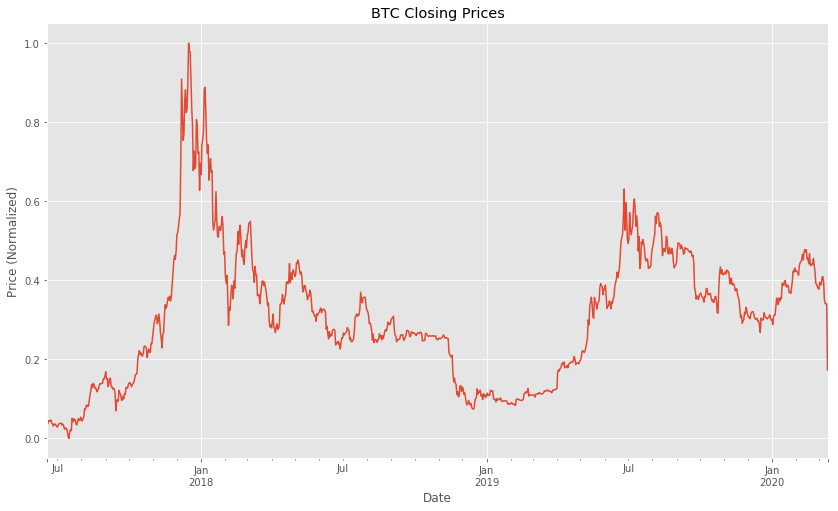

In [247]:
# Plotting the Closing Prices
df['Close'].plot(figsize=(14,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

### Functions to prepare the data for LSTM

In [248]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into x = (price and indicators) and y = price
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [249]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [250]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

### Splitting the Data

In [251]:
# How many periods looking back to learn
n_per_in  = 30

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = df.shape[1]

# Splitting the data into appropriate sequences
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
#X = X.reshape((X.shape[0], X.shape[1], n_features))

## Modeling - LSTM (RNN)

### Creating the Neural Network

In [252]:
# Instatiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(1, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=1, n_nodes=2, activation=activ)

# Final Hidden layer
model.add(LSTM(1, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30, 1)             284       
_________________________________________________________________
lstm_19 (LSTM)               (None, 30, 2)             32        
_________________________________________________________________
lstm_20 (LSTM)               (None, 1)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [253]:
# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [254]:
res = model.fit(X, y, epochs=20, batch_size=128, validation_split=0.1)

Train on 864 samples, validate on 97 samples
Epoch 1/20
864/864 [==============================] - 2s 2ms/step - loss: 0.1231 - accuracy: 0.1076 - val_loss: 0.1322 - val_accuracy: 0.0722
Epoch 2/20
864/864 [==============================] - 0s 310us/step - loss: 0.1173 - accuracy: 0.1076 - val_loss: 0.1253 - val_accuracy: 0.0722
Epoch 3/20
864/864 [==============================] - 0s 367us/step - loss: 0.1118 - accuracy: 0.1076 - val_loss: 0.1188 - val_accuracy: 0.0722
Epoch 4/20
864/864 [==============================] - 0s 318us/step - loss: 0.1067 - accuracy: 0.1076 - val_loss: 0.1127 - val_accuracy: 0.0722
Epoch 5/20
864/864 [==============================] - 0s 310us/step - loss: 0.1018 - accuracy: 0.1076 - val_loss: 0.1068 - val_accuracy: 0.0722
Epoch 6/20
864/864 [==============================] - 0s 316us/step - loss: 0.0973 - accuracy: 0.1076 - val_loss: 0.1012 - val_accuracy: 0.0722
Epoch 7/20
864/864 [==============================] - 0s 325us/step - loss: 0.0930 - accuracy

### Plotting the Accuracy and Loss

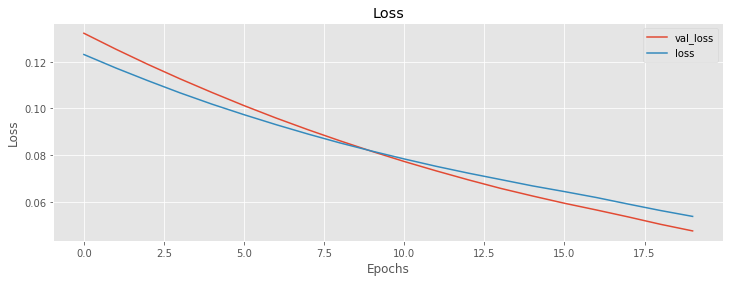

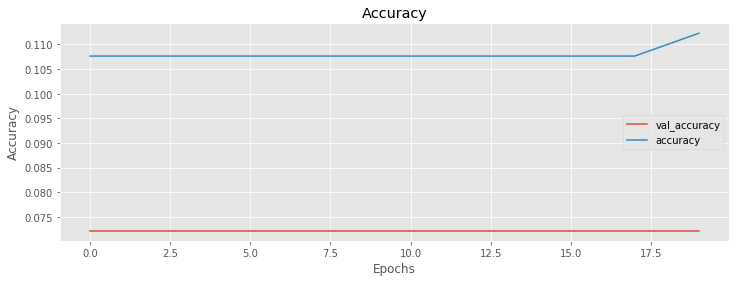

In [255]:
visualize_training_results(res)

## Visualizing the Predictions

### Validating the Model 
Plotting the difference between the Actual closing prices and the Predicted prices

Predicted Prices:
 [[0.22925975918769836], [0.297188401222229], [0.03991689532995224], [0.2201629877090454], [0.08932153880596161], [0.140985369682312], [0.23848868906497955], [0.28785568475723267], [0.285780131816864], [0.026063211262226105]]

Actual Prices:
 [[0.3885239728583466], [0.40693951972394116], [0.40943179252935535], [0.39733042224301596], [0.3516873757511916], [0.3411866878176689], [0.3403946015629018], [0.3404914096580931], [0.17310113646671846], [0.1801774924503555]]


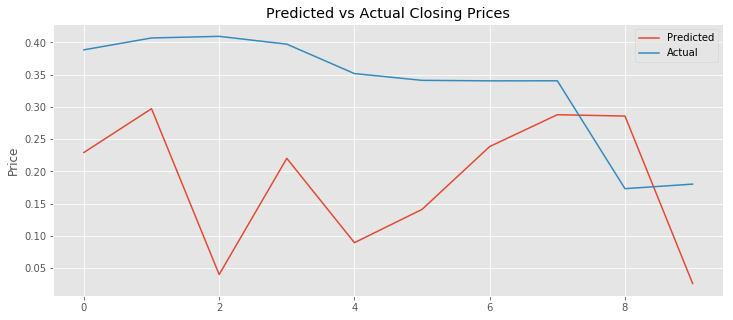

In [262]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features))

# Transforming values back to their normal prices
yhat = close_scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = close_scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

### Predicting/Forecasting the future prices

                  Close
2019-12-02  7750.527979
2019-12-03  7993.556731
2019-12-04  8048.777666
2019-12-05  8293.133372
2019-12-06  8278.055115
2019-12-07  8168.779239
2019-12-08  7833.326193
2019-12-09  7327.463403
2019-12-10  7053.108825
2019-12-11  6831.816325


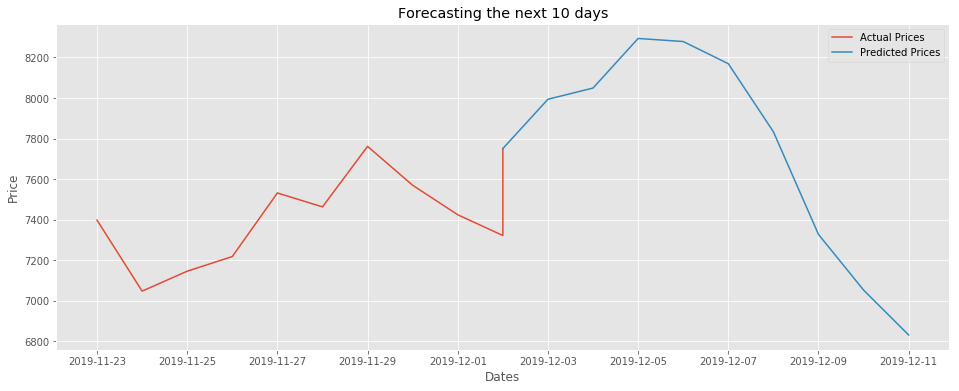

In [94]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()